In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#Set-up
with cd(os.path.join(os.getcwd(),'..')):
    results_path=os.path.join(os.path.join(os.getcwd(),"Ap1"))
    assert os.path.isdir(results_path), "Wrong folder"
#     print(scal_path)
exp_type="Par_Comb_"

cols=["Eff_2","Fit_var"]
metric_list=["MBF","MEff"]
dir_folder=results_path

Parameters=["ELITIST","PR_CROSS","PR_MUT","MBF"]
criteria="CritSum"


In [3]:
class_name_list=[name for name in os.listdir(dir_folder) if exp_type in name]
#create class_list (as dict)
class_dict={}

for class_name in class_name_list:
    class_dict[class_name] = table_class(class_name,results_path,exp_type,metric_list,cols)

In [4]:
df_dict=table_pipeline_basic(class_dict,drop=True)

In [5]:
def_table=pd.concat(df_dict.values())

In [6]:
rank_table=rank_tables(df_dict,Parameters)

In [7]:
rank_table.head()
# table_path=os.path.join(results_path,"Ap1_rank_table.csv")
# rank_table.to_csv(table_path)

,ELITIST,PR_CROSS,PR_MUT,MBF,CritSum
382,0.139749,0.565568,0.338008,22.323684,3.281753
254,0.139749,0.630520,0.189580,22.562492,3.268534
836,0.135933,0.565568,0.189437,22.239450,3.265649


# Plotting MBF

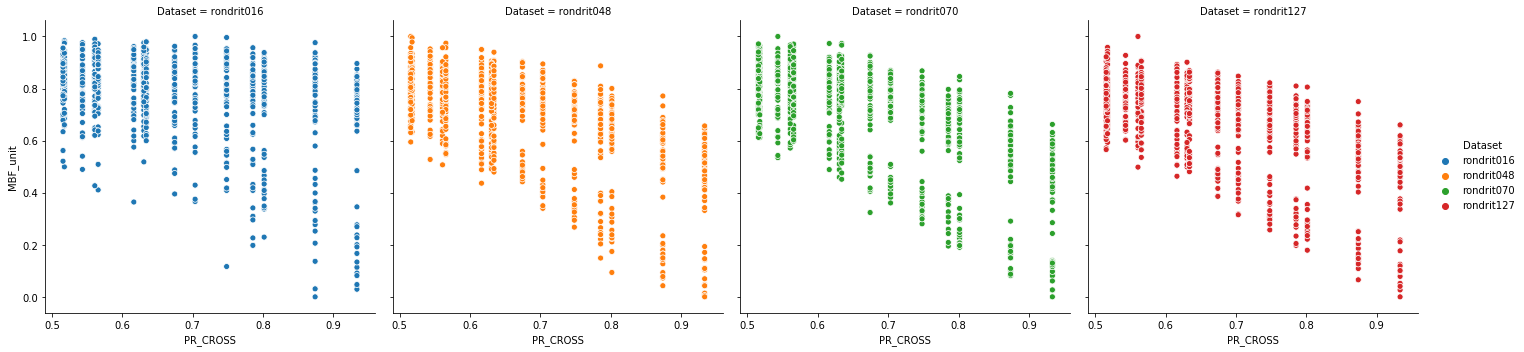

In [8]:
sns.relplot(x="PR_CROSS", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


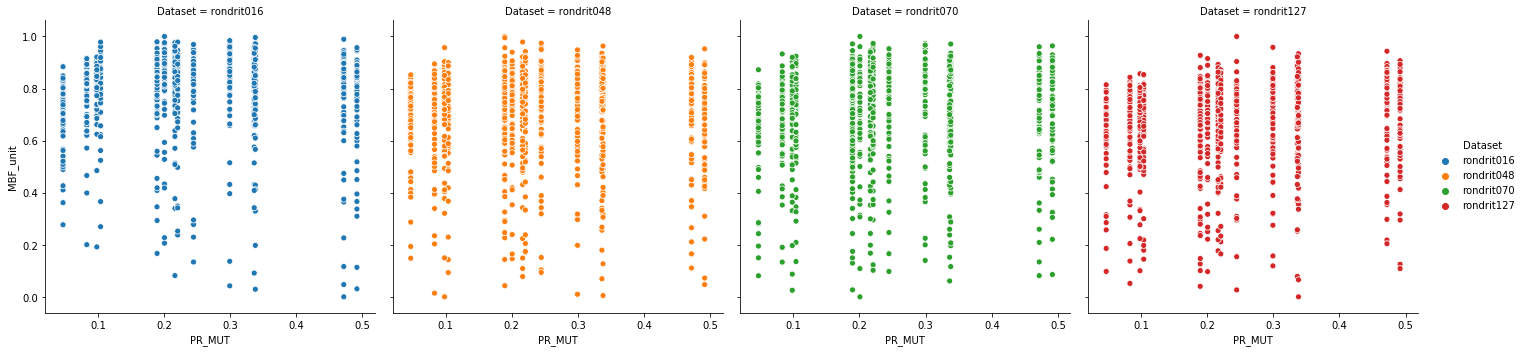

In [9]:
sns.relplot(x="PR_MUT", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


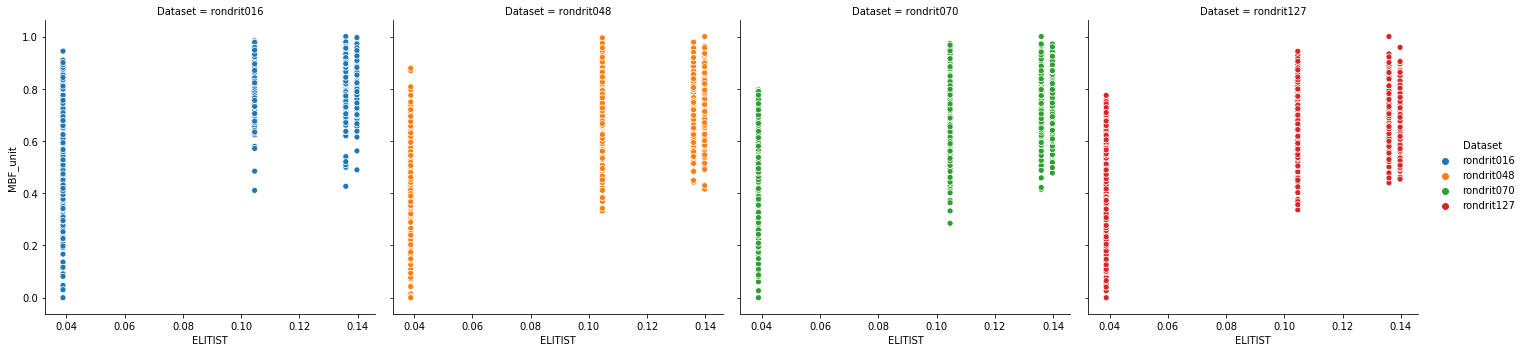

In [10]:
sns.relplot(x="ELITIST", y="MBF_unit", hue="Dataset",col="Dataset" ,data=def_table);


# Plotting MEff


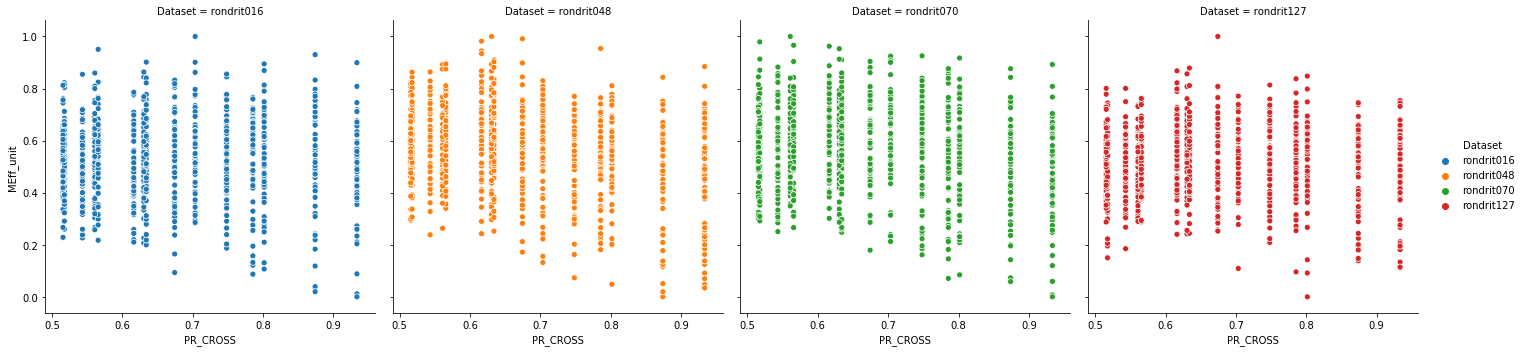

In [11]:
sns.relplot(x="PR_CROSS", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


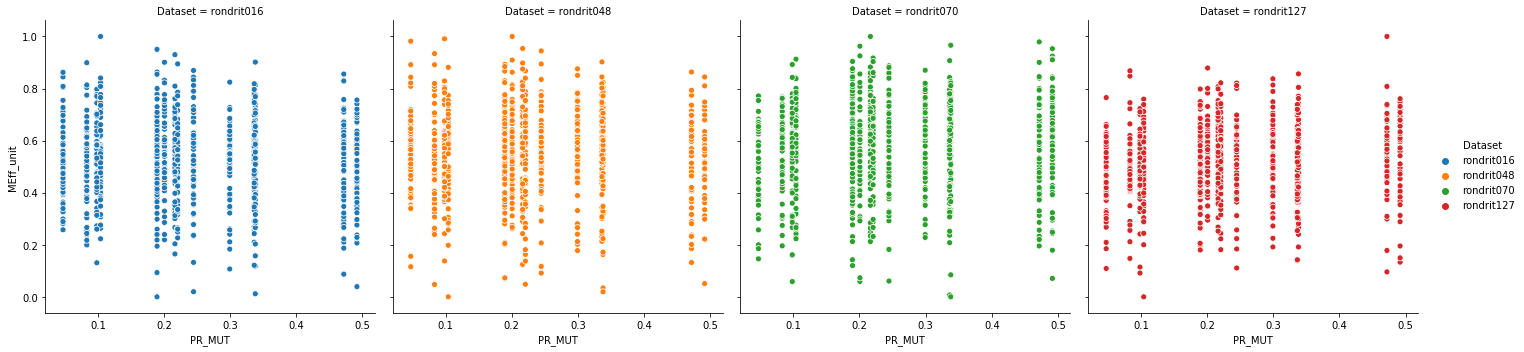

In [12]:
sns.relplot(x="PR_MUT", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


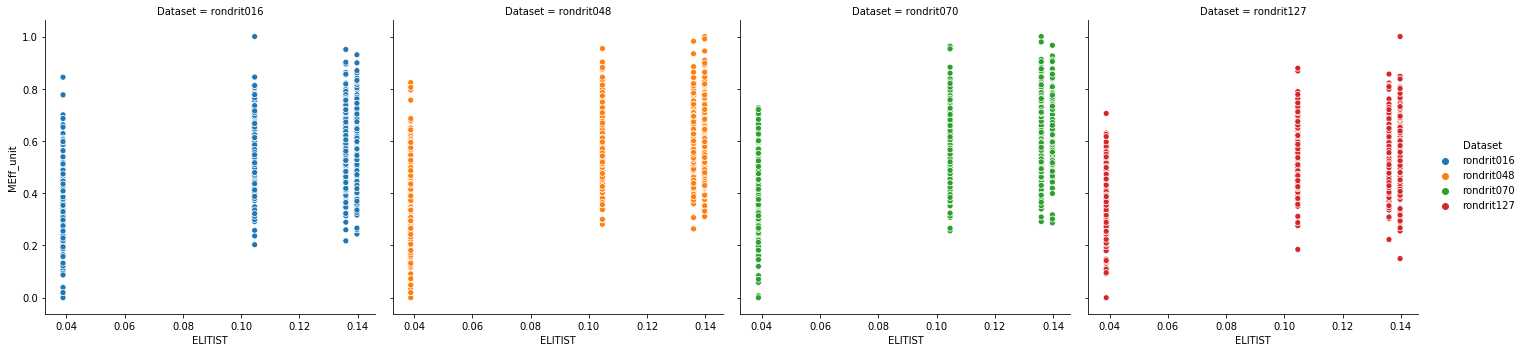

In [13]:
sns.relplot(x="ELITIST", y="MEff_unit", hue="Dataset",col="Dataset" ,data=def_table);


# Second Stage (Running Res)

In [14]:
ts_files=[file for file in os.listdir(results_path) if ("Running_Res" in file) and  (".mat" in file)]
dict_ts={}

for el in zip(ts_files,df_dict.keys()):
    file=el[0]; Dataset=el[1]
    dict_ts[Dataset]=load_matlab_ts(file,results_path)

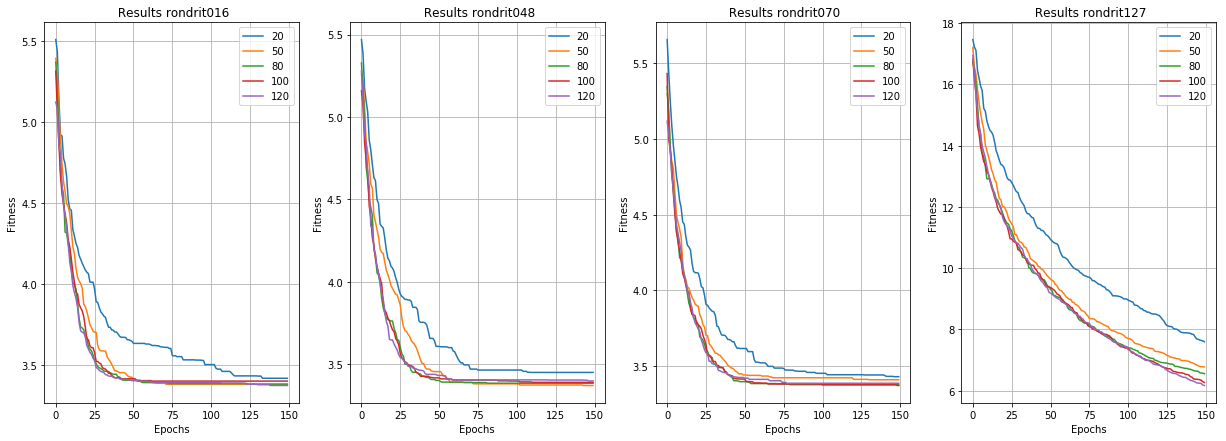

In [15]:
fig, axs = plt.subplots(1, len(df_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])